In [1]:
import pandas as pd

In [2]:
auto_data = pd.read_csv('../data/auto-mpg.data', delim_whitespace=True, header=None,
                        names = ['mpg',
                                 'cylinders',
                                 'displacement',
                                 'horsepower',
                                 'weight',
                                 'acceleration',
                                 'model',
                                 'origin',
                                 'car_name'])

In [3]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
auto_data = auto_data.drop('car_name', axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
# Encode using one hot encoding
auto_data['origin'] = auto_data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,america
1,15.0,8,350.0,165.0,3693.0,11.5,70,america
2,18.0,8,318.0,150.0,3436.0,11.0,70,america
3,16.0,8,304.0,150.0,3433.0,12.0,70,america
4,17.0,8,302.0,140.0,3449.0,10.5,70,america


In [6]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [7]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)

In [8]:
auto_data = auto_data.dropna()
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.00,2130.0,24.6,82,0,0,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('mpg', axis=1)

# Taking the labels
Y = auto_data['mpg']

# Spliting into 80% fro training
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
from sklearn.svm import SVR
# pass linear, because we want perform linear regression, 
# C is the penalty factor for points wich lie outside of our support vector margin
regression_model = SVR(kernel='linear', C=1.0)
regression_model.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
regression_model.coef_

array([[-0.65131731,  0.10313732, -0.16190965, -0.00896875,  0.4332911 ,
         0.85408954, -1.85266565,  0.70061963,  1.15204602]])

In [13]:
regression_model.score(X_train, Y_train)

0.6193757170869002

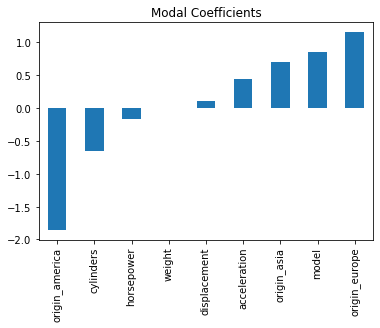

In [14]:
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

predictors = X_train.columns
coef = Series(regression_model.coef_[0], predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [15]:
y_predict = regression_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


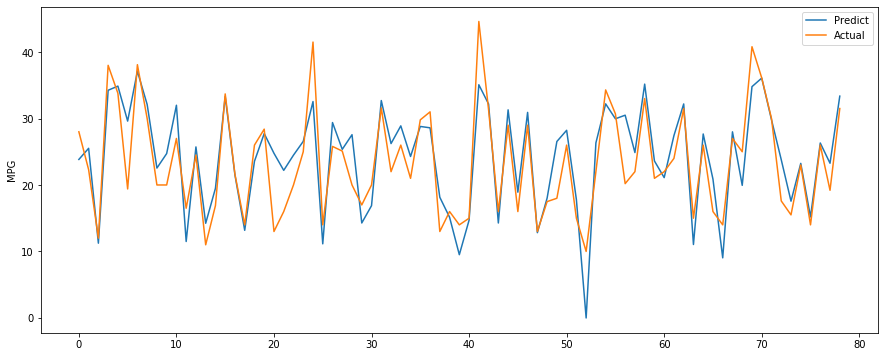

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predict')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [17]:
regression_model.score(x_test, y_test)

0.7189384368816836

In [18]:
from sklearn.metrics import mean_squared_error

regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

17.469469948804594

In [19]:
import math

math.sqrt(regression_model_mse)

4.179649500712302